In [6]:
import numpy as np
import matplotlib.pyplot as plt

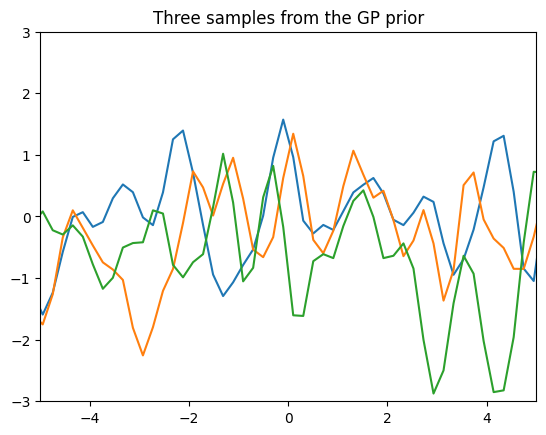

In [ ]:
# Our test data
n = 100
x_test = np.linspace(-10,10, n).reshape(-1,1)

# Defining the kernel function (RBF)
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
k_ss = kernel(x_test, x_test, param)

# Chol Decomp of kernel
L = np.linalg.cholesky(k_ss + 1e-15*np.eye(n))

# Sample 3 sets of standard normals for our test points, multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3)))

plt.plot(x_test, f_prior)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP prior')
plt.show()

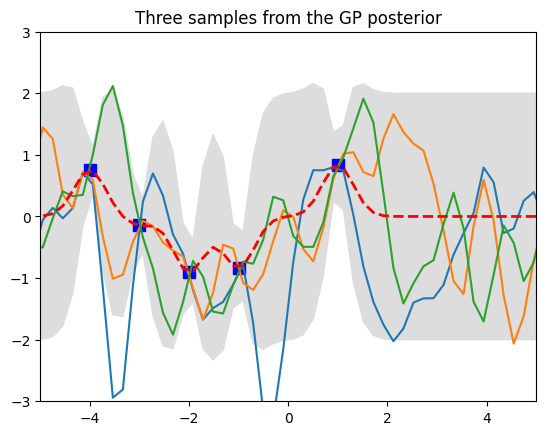

In [16]:
# Noiseless training data
x_train = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
y_train = np.sin(x_train)

# Apply the kernel function to X
K = kernel(x_train, x_train, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(x_train)))

# Compute the mean at our test points.
k_s = kernel(x_train, x_test, param)
Lk = np.linalg.solve(L, k_s)
mu = np.dot(Lk.T, np.linalg.solve(L, y_train)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(k_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(k_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

plt.plot(x_train, y_train, 'bs', ms=8)
plt.plot(x_test, f_post)
plt.gca().fill_between(x_test.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
plt.plot(x_test, mu, 'r--', lw=2)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP posterior')
plt.show()